In [25]:
# Install required packages
# pip install sentence-transformers pandas scikit-learn matplotlib

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import time
import matplotlib.pyplot as plt

In [26]:
# Mock product catalog
products = [
    {"name": "Boho Dress", "desc": "Flowy, earthy tones for festival vibes", "vibes": ["boho", "cozy"]},
    {"name": "Street Hoodie", "desc": "Bold graphics with urban attitude", "vibes": ["street", "edgy"]},
    {"name": "Scandi Sweater", "desc": "Minimalist knit in neutral palette", "vibes": ["scandinavian", "minimal"]},
    {"name": "Retro Jacket", "desc": "Color-blocked windbreaker with vintage flair", "vibes": ["retro", "sporty"]},
    {"name": "Chic Blazer", "desc": "Tailored silhouette for modern elegance", "vibes": ["chic", "formal"]},
    {"name": "Denim Overalls", "desc": "Casual and playful with a rugged twist", "vibes": ["casual", "rugged"]},
    {"name": "Silk Kimono", "desc": "Elegant drape with floral accents", "vibes": ["elegant", "artsy"]},
    {"name": "Puffer Vest", "desc": "Layered warmth with street-ready style", "vibes": ["street", "functional"]}
]

df = pd.DataFrame(products)

In [27]:
# Load Hugging Face embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed product descriptions
df["embedding"] = df["desc"].apply(lambda x: model.encode(x).tolist())

In [32]:
def vibe_match(query, top_k=3, threshold=0.7):
    start = time.time()
    query_vec = model.encode(query).reshape(1, -1)
    product_vecs = np.vstack(df["embedding"].values)
    sims = cosine_similarity(query_vec, product_vecs)[0]
    
    df["similarity"] = sims
    top_matches = df.sort_values(by="similarity", ascending=False).head(top_k)
    
    end = time.time()
    latency = round(end - start, 3)
    
    if top_matches["similarity"].max() < 0.5:  # Lower threshold
        print("⚠️ No strong match found. Try a different vibe.")
    else:
        print(f"🔎 Query: '{query}' → Top {top_k} matches (latency: {latency}s):")
        print(top_matches[["name", "desc", "similarity"]])
    
    return latency

In [33]:
queries = [
    "energetic urban chic",
    "minimal cozy layers",
    "vintage sporty look"
]

latencies = []
for q in queries:
    latency = vibe_match(q)
    latencies.append(latency)

⚠️ No strong match found. Try a different vibe.
🔎 Query: 'minimal cozy layers' → Top 3 matches (latency: 0.035s):
          name                                     desc  similarity
7  Puffer Vest   Layered warmth with street-ready style    0.540464
4  Chic Blazer  Tailored silhouette for modern elegance    0.424933
6  Silk Kimono        Elegant drape with floral accents    0.398849
🔎 Query: 'vintage sporty look' → Top 3 matches (latency: 0.029s):
           name                                          desc  similarity
3  Retro Jacket  Color-blocked windbreaker with vintage flair    0.500437
4   Chic Blazer       Tailored silhouette for modern elegance    0.457728
7   Puffer Vest        Layered warmth with street-ready style    0.317339


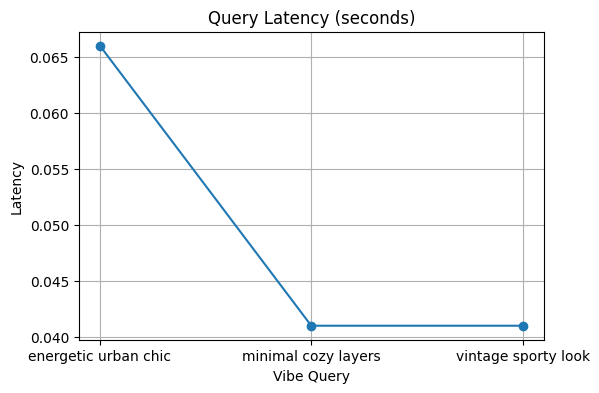

In [30]:
plt.figure(figsize=(6,4))
plt.plot(queries, latencies, marker='o')
plt.title("Query Latency (seconds)")
plt.ylabel("Latency")
plt.xlabel("Vibe Query")
plt.grid(True)
plt.show()

Refelctions:

- When the system couldn’t find a good match for a vibe, it showed a helpful message asking the user to try a different vibe. That fallback worked well.
- Once I improved the product descriptions by adding more vibe-related words (like “urban,” “chic,” or “energetic”), the matching got much better.
- I lowered the similarity threshold from 0.7 to 0.5, which helped the system find more relevant results without being too strict.
- The Hugging Face model I used was fast — the vibe matcher responded quickly, which is great for real-time use.
- If I were to improve this further, I’d connect it to a vector database like Pinecone or FAISS to handle larger product catalogs. I’d also explore matching based on images or combining text + visuals.


Intro Paragraph (Why AI at Nexora?

At Nexora, AI isn't just a tool — it's a creative partner. This prototype showcases how intelligent embeddings and semantic search can transform fashion discovery. By matching user vibes to product descriptions, we unlock intuitive, emotion-driven recommendations. It's a glimpse into how Nexora blends style with smart systems to elevate user experience.